In [29]:
import numpy as np
import neurolab as nl
import os
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Normalization

In [79]:
#part using Keras

noisyImgDir = 'Cats/noisy_32/88%'
#dataset16x16 = keras.utils.image_dataset_from_directory(noisyImgDir, batch_size=116, image_size=(32, 32))

class Dataset:
    def __init__(self, data, target):
        self.data = data
        self.target = target

def LoadDataSet(inputImagesDirectory:str, targetImagesDirectory:str,  nbMaxImages:int = -1):
    files = [f for f in os.listdir(inputImagesDirectory) if os.path.isfile(inputImagesDirectory + "/" + f) and f.endswith(".jpg")]
    if(nbMaxImages >= 1 and len(files) > nbMaxImages):
        files = files[0:nbMaxImages]
    images = [Image.open(inputImagesDirectory + imageName) for imageName in files]

    tmpInputData = []# np.zeros(size= (len(files), images[0].size[0], images[0].size[1], 3))
    for image in images:
        tmp = []
        for i in range(0, image.size[0]):
            tmp.append([])
            for j in range(image.size[1]):
                pixel = image.getpixel((i, j))
                tmp[i].append([pixel[0], pixel[2], pixel[2]])

        tmpInputData.append(tmp)
    inputData = np.array(tmpInputData)
    tmpInputData = [] 

    files = [f for f in os.listdir(targetImagesDirectory) if os.path.isfile(targetImagesDirectory + "/" + f) and f.endswith(".jpg")]
    if(nbMaxImages >= 1 and len(files) > nbMaxImages):
        files = files[0:nbMaxImages]
    images = [Image.open(inputImagesDirectory + imageName) for imageName in files]

    tmpOutputData = []
    for image in images:
        tmp = []
        for i in range(0, image.size[0]):
            tmp.append([])
            for j in range(image.size[1]):
                pixel = image.getpixel((i, j))
                tmp[i].append([pixel[0], pixel[2], pixel[2]])

        tmpOutputData.append(tmp)
    outputData = np.array(tmpOutputData)
    tmpOutputData = [] 

    #normalizing the data
    normalizer = Normalization(axis=-1)
    normalizer.adapt(inputData)
    inputData = normalizer(inputData)

    normalizer = Normalization(axis=-1)
    normalizer.adapt(outputData)
    outputData = normalizer(outputData)

    return Dataset(inputData, outputData)
    
dataSet = LoadDataSet("Cats/noisy_32/88%/", "Cats/pixellized_32/", 10)

#print(dataSet.data)
#print(dataSet.target)

tf.Tensor(
[[[[ 0.6211502   0.91807437  0.91807437]
   [ 0.75541973  0.98871326  0.98871326]
   [ 0.87626237  1.1064447   1.1064447 ]
   ...
   [ 0.5942963   1.0004864   1.0004864 ]
   [ 0.71513885  1.0004864   1.0004864 ]
   [ 0.5540154   1.0004864   1.0004864 ]]

  [[ 0.7957006   0.85920864  0.85920864]
   [ 0.47345367  0.76502347  0.76502347]
   [-1.3794663  -0.97740215 -0.97740215]
   ...
   [ 0.56744236  0.812116    0.812116  ]
   [ 0.6211502   0.8827549   0.8827549 ]
   [ 0.92997015  0.92984754  0.92984754]]

  [[ 0.5942963   0.91807437  0.91807437]
   [-0.6812646  -0.03555046 -0.03555046]
   [ 0.41974583  0.87098175  0.87098175]
   ...
   [ 0.6614311   1.0475789   1.0475789 ]
   [ 0.71513885  0.8827549   0.8827549 ]
   [ 0.60772324  0.77679664  0.77679664]]

  ...

  [[ 0.60772324  0.76502347  0.76502347]
   [ 0.60772324  0.9651669   0.9651669 ]
   [ 0.15120672  0.5413337   0.5413337 ]
   ...
   [ 0.6614311   1.0240327   1.0240327 ]
   [ 0.80912757  1.0240327   1.0240327 ]
   [ 

In [53]:
training_data = np.random.randint(0, 256, size=(5, 4, 4, 3)).astype("float32")
#print(training_data[0])*

arr = [[[[125,98,111],[214,2,35],[125,187,99],[235,201,154]],[[125,98,111],[214,2,35],[125,187,99],[235,201,154]],[[125,98,111],[214,2,35],[125,187,99],[235,201,154]],[[125,98,111],[214,2,35],[125,187,99],[235,201,154]]]]
arr2 = [[[[125,98,111],[214,2,35],[125,187,99],[235,201,154]],[[125,98,111],[214,2,35],[125,187,99],[235,201,154]],[[125,98,111],[214,2,35],[125,187,99],[235,201,154]],[[125,98,111],[214,2,35],[125,187,99],[235,201,154]]]]

npArr = np.array(arr)
npArr = np.append(npArr, arr2)
print(npArr)


[125  98 111 214   2  35 125 187  99 235 201 154 125  98 111 214   2  35
 125 187  99 235 201 154 125  98 111 214   2  35 125 187  99 235 201 154
 125  98 111 214   2  35 125 187  99 235 201 154 125  98 111 214   2  35
 125 187  99 235 201 154 125  98 111 214   2  35 125 187  99 235 201 154
 125  98 111 214   2  35 125 187  99 235 201 154 125  98 111 214   2  35
 125 187  99 235 201 154]


In [8]:
#part using Neural network lib 

def CreateNeuralNetwork(nbInput:int, nbOutput:int, inputRange, nbLayers:int, nbNeuronsPerLayer):
    inputDescription = []
    for i in range(0, nbInputs):
        inputDescription.append(inputRange[i])

    layersDescription = []
    for i in range(0, nbLayers - 1):
        layersDescription.append(int(nbNeuronsPerLayers[i]))

    layersDescription.append(nbOutputs)
    return nl.net.newff(inputDescription, layersDescription)

#neural network Stats
imageSize = np.array([16, 16])
nbInputs = imageSize[0] * imageSize[1] * 3
nbOutputs = imageSize[0] * imageSize[1] * 3
nbLayers = 10
inputRange = [[0, 1] for i in range(0, nbInputs)]
nbNeuronsPerLayers = np.ones(nbLayers) * 15

net = CreateNeuralNetwork(nbInputs, nbOutputs, inputRange, nbLayers, nbNeuronsPerLayers)
print("nb Input : " + str(net.ci))
print("nb Output : " + str(net.co))
print("nb Layers : " + str(len(net.layers)))

nb Input : 768
nb Output : 768
nb Layers : 10


In [4]:
def PlotError(err):
    plt.figure()
    plt.plot(err)
    plt.xlabel('Number of epochs')
    plt.ylabel('Training error')
    plt.grid()
    plt.show()

KeyboardInterrupt: 

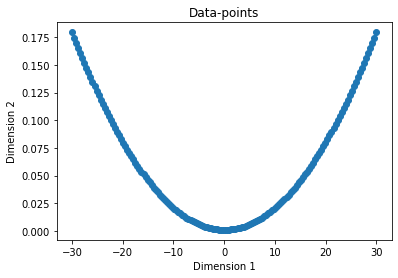

In [10]:
#test
#net pour trouver l'équation 2*x² + 8

min_val = -30
max_val = 30
num_points = 150
x = np.linspace(min_val, max_val, num_points)
y = 2 * np.square(x) + 8
y /= np.linalg.norm(y)

data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)

plt.figure()
plt.scatter(data, labels)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data-points')

#Now, build the neural network having two hidden layers with neurolab with ten neurons in the first hidden layer, six in the second hidden layer and one in the output layer.
neural_net = nl.net.newff([[min_val, max_val]], [10, 6, 1])

#using the gradient training algorithm −
neural_net.trainf = nl.train.train_gd

#train!
error = neural_net.train(data, labels, epochs = 1000, show = 100, goal = 0.01)

output = neural_net.sim(data)
y_pred = output.reshape(num_points)

plt.figure()
plt.plot(error)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Training error progress')


x_dense = np.linspace(min_val, max_val, num_points * 2)
y_dense_pred = neural_net.sim(x_dense.reshape(x_dense.size,1)).reshape(x_dense.size)
plt.figure()
plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')
plt.title('Actual vs predicted')
plt.show()


In [7]:
def Train(dataset):
    return net.train(dataSet.data, dataSet.target,epochs = 500, show = 50, goal = 0.01)

"""
dataSet = LoadDataSet("Cats/noisy/88%/", "Cats/pixellized/", 10)

for i in range(0, len(dataSet.data)):
    dataSet.data[i] = dataSet.data[i][0 : nbEntriesAndOutput]
    dataSet.target[i] = dataSet.target[i][0 : nbEntriesAndOutput]
"""
err = Train(dataSet)

PlotError(err)

MemoryError: Unable to allocate 4.94 GiB for an array with shape (25743, 25743) and data type float64